In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# Copyright (c) 2022 Milan Ondrašovič <milan.ondrasovic@gmail.com>
#
# MIT License
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE

import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import config as cfg
from dataset import (
    load_dataset_and_extract_features, MultiClassLabelGetter
)

plt.style.use('dark_background')

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
quality_factors_bounds = [20, 40, 60, 80, 100]
label_names = ['best', 'very-low', 'low', 'medium', 'high', 'very-high']

label_getter = MultiClassLabelGetter(quality_factors_bounds)

In [4]:
features_train, labels_train = load_dataset_and_extract_features(
    cfg.TRAIN_DIR_PATH, label_getter
)
features_test, labels_test = load_dataset_and_extract_features(
    cfg.TEST_DIR_PATH, label_getter
)

features_train.shape, features_test.shape

100%|██████████| 174/174 [00:05<00:00, 29.94it/s]


((708, 192), (174, 192))

In [5]:
np.unique(labels_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([118, 118, 118, 118, 118, 118], dtype=int64))

In [6]:
lr = 1e-2
momentum = 0.9
batch_size = 64
n_epochs = 256

model = MLPClassifier(
    hidden_layer_sizes=(512, 512, 256),
    activation='relu',
    solver='sgd',
    alpha=1e-4,
    batch_size=batch_size,
    learning_rate_init=lr,
    learning_rate='invscaling',
    power_t=0.1,
    max_iter=n_epochs,
    momentum=momentum,
    random_state=731995,
    verbose=True
)
pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('model', model)
    ],
    verbose=True
)

pipeline.fit(features_train, labels_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
Iteration 1, loss = 1.46712385
Iteration 2, loss = 1.19862162
Iteration 3, loss = 1.10292817
Iteration 4, loss = 1.04638123
Iteration 5, loss = 1.00300635
Iteration 6, loss = 0.98095748
Iteration 7, loss = 0.94302495
Iteration 8, loss = 0.90960035
Iteration 9, loss = 0.86635329
Iteration 10, loss = 0.84421264
Iteration 11, loss = 0.81694429
Iteration 12, loss = 0.79019435
Iteration 13, loss = 0.75813479
Iteration 14, loss = 0.73765418
Iteration 15, loss = 0.73487059
Iteration 16, loss = 0.70047557
Iteration 17, loss = 0.68533663
Iteration 18, loss = 0.67174762
Iteration 19, loss = 0.65559280
Iteration 20, loss = 0.63753361
Iteration 21, loss = 0.61073377
Iteration 22, loss = 0.60113332
Iteration 23, loss = 0.61085392
Iteration 24, loss = 0.59562855
Iteration 25, loss = 0.56975568
Iteration 26, loss = 0.54845881
Iteration 27, loss = 0.53460667
Iteration 28, loss = 0.52562565
Iteration 29, loss = 0.52150478
Iteration 

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 MLPClassifier(batch_size=64,
                               hidden_layer_sizes=(512, 512, 256),
                               learning_rate='invscaling',
                               learning_rate_init=0.01, max_iter=256,
                               power_t=0.1, random_state=731995, solver='sgd',
                               verbose=True))],
         verbose=True)

In [7]:
labels_pred = pipeline.predict(features_test)
print(classification_report(labels_test, labels_pred, target_names=label_names))

              precision    recall  f1-score   support

        best       1.00      0.97      0.98        29
    very-low       0.86      0.86      0.86        29
         low       0.75      0.83      0.79        29
      medium       0.70      0.72      0.71        29
        high       0.50      0.76      0.60        29
   very-high       0.82      0.31      0.45        29

    accuracy                           0.74       174
   macro avg       0.77      0.74      0.73       174
weighted avg       0.77      0.74      0.73       174



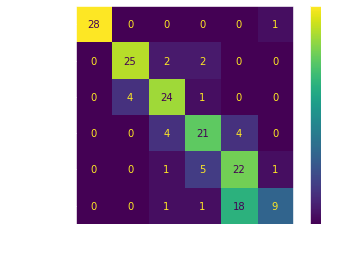

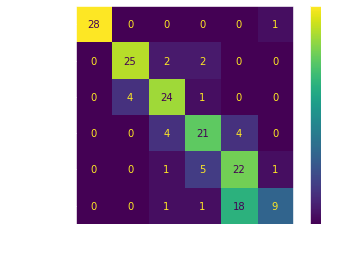

In [8]:
disp = ConfusionMatrixDisplay.from_predictions(
    labels_test, labels_pred, display_labels=label_names
)
disp.plot()
plt.savefig('CM_multi_MLP_classifier.png', dpi=200)